In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('encoded.csv')

In [2]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape

# Assuming X contains your 97 features and y contains the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

accuracy = (1-mape(y_test, y_pred))*100

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)
print("Accuracy :", accuracy)

Mean Squared Error (MSE): 309.26191486907476
Root Mean Squared Error (RMSE): 17.585844161400804
Mean Absolute Error (MAE): 12.426315663907804
R-squared (R2) Score: 0.7053441889452865
Accuracy : 89.83287302006721


In [4]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

accuracy = (1-mape(y_test, y_pred))*100

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)
print("Accuracy :", accuracy)

Mean Squared Error (MSE): 316.91347233312644
Root Mean Squared Error (RMSE): 17.802063709950215
Mean Absolute Error (MAE): 12.946531491528528
R-squared (R2) Score: 0.6980540062166554
Accuracy : 89.47248373394534


1. Feature 31: 0.14867614209651947
2. Feature 94: 0.1021876335144043
3. Feature 34: 0.09474343806505203
4. Feature 41: 0.07278047502040863
5. Feature 8: 0.048995912075042725
6. Feature 81: 0.043992381542921066
7. Feature 73: 0.036826472729444504
8. Feature 93: 0.036305155605077744
9. Feature 15: 0.03536786139011383
10. Feature 56: 0.030304335057735443
11. Feature 0: 0.022187646478414536
12. Feature 27: 0.02194269560277462
13. Feature 76: 0.021107664331793785
14. Feature 55: 0.020341353490948677
15. Feature 12: 0.016184573993086815
16. Feature 16: 0.012994212098419666
17. Feature 36: 0.011347602121531963
18. Feature 96: 0.011075989343225956
19. Feature 38: 0.010665004141628742
20. Feature 33: 0.010209327563643456
21. Feature 90: 0.01000315323472023
22. Feature 43: 0.009922836907207966
23. Feature 86: 0.009351501241326332
24. Feature 47: 0.009052000008523464
25. Feature 4: 0.008828746154904366
26. Feature 60: 0.00875877495855093
27. Feature 85: 0.008744257502257824
28. Feature 49: 0.0078

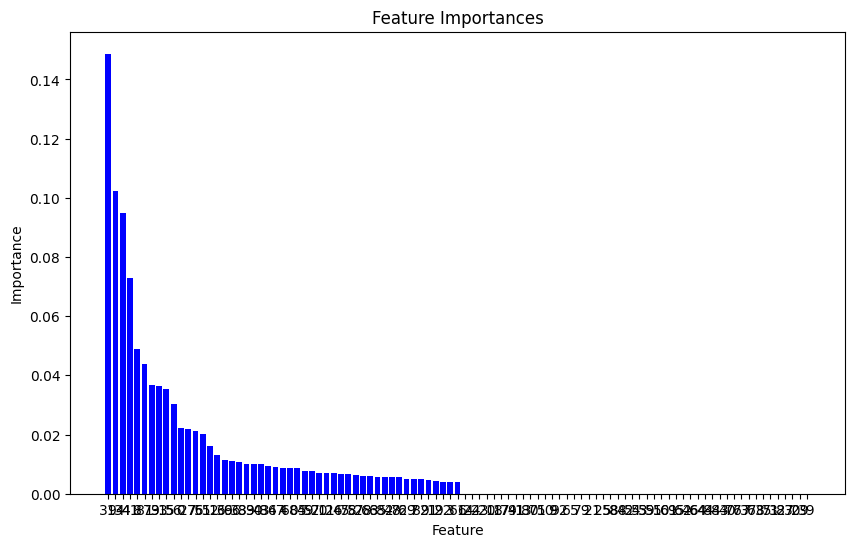

In [5]:
importance = xgb_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]

# Print feature importances
for f in range(x.shape[1]):
    print(f"{f + 1}. Feature {indices[f]}: {importance[indices[f]]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), importance[indices], color="b", align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [6]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from scipy.stats import pearsonr
import numpy as np

# Assuming you have your features X and target y

k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)

models = {
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(),
    'Lasso': Lasso(alpha=0.1)
}

metrics = {
    'MAE': mean_absolute_error,
    'MSE': mean_squared_error,
    'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'R2 Score': r2_score,
    'Accuracy': lambda y_true, y_pred: (1-mape(y_test, y_pred))*100,
    'Pearson Coefficient': lambda y_true, y_pred: pearsonr(y_true, y_pred)[0]
}

results = pd.DataFrame(columns=metrics.keys())

for model_name, model in models.items():
    model_results = []
    for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        metric_values = [metric(y_test, y_pred) for metric in metrics.values()]
        model_results.append(metric_values)

    avg_results = np.mean(model_results, axis=0)
    results.loc[model_name] = avg_results



KeyError: "None of [Index([    0,     1,     3,     5,     7,     8,     9,    10,    11,    12,\n       ...\n       11074, 11075, 11078, 11079, 11080, 11081, 11083, 11084, 11085, 11087],\n      dtype='int64', length=8870)] are in the [columns]"

In [7]:
from sklearn.feature_selection import SelectFromModel

# Use SelectFromModel to select top features based on feature importance
selector = SelectFromModel(xgb_model, threshold=-np.inf, max_features=30)
selector.fit(X_train, y_train)

# Transform the training and testing data to include only the selected features
X_train_top30 = selector.transform(X_train)
X_test_top30 = selector.transform(X_test)

# Train the model on the top 30 features
xgb_model_top30 = xgb.XGBRegressor()
xgb_model_top30.fit(X_train_top30, y_train)

# Make predictions on the test data using the top 30 features
y_pred = xgb_model_top30.predict(X_test_top30)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

accuracy = (1-mape(y_test, y_pred))*100

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)
print("Accuracy :", accuracy)
print(pearsonr(y_test, y_pred)[0])

Mean Squared Error (MSE): 328.7701215231208
Root Mean Squared Error (RMSE): 18.132019234578394
Mean Absolute Error (MAE): 12.944645025348775
R-squared (R2) Score: 0.686757333669866
Accuracy : 89.42983298626494
0.8295307684937417


In [8]:
results

,MAE,MSE,RMSE,R2 Score,Accuracy,Pearson Coefficient


In [95]:
results.to_csv("evaluation.csv")

In [9]:
results = pd.read_csv("evaluation.csv")
results

,Unnamed: 0,MAE,MSE,RMSE,R2 Score,Accuracy,Pearson Coefficient
0,SVR,15.740,432.23,20.78,0.57,87.14,0.76
1,Random Forest,12.130,300.54,17.33,0.70,90.02,0.84
2,XGBoost,12.830,311.69,17.65,0.69,89.53,0.83
3,Lasso,16.974,470.77,21.69,0.54,86.06,0.73
4,XGB_30,12.940,328.77,18.13,0.68,89.42,0.82


/var/folders/06/90lvzyms2yvgdbv2df388ngw0000gn/T/ipykernel_60530/1223412796.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models, rotation=90)


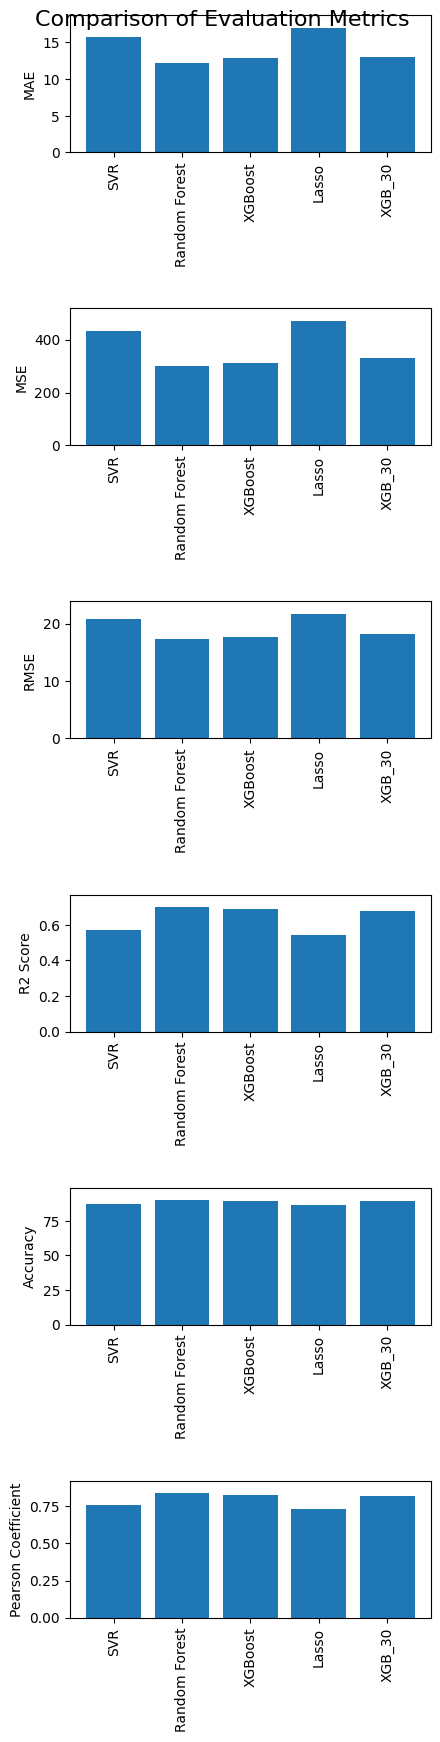

In [25]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'results' with models as row names and metrics as columns

# Define the models and metrics
models = results['Unnamed: 0'].tolist()
metrics = results.columns.tolist()[1:]

# Create subplots for each metric
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(5, 3*len(metrics)))

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    values = results[metric].values
    ax.bar(models, values)
    ax.set_ylabel(metric)
    ax.set_ylim([0, max(values) * 1.1])  # Adjust the y-axis limits if needed
    ax.set_xticklabels(models, rotation=90)

# Adjust spacing between subplots and set overall title
fig.tight_layout(pad=3)
fig.suptitle('Comparison of Evaluation Metrics', fontsize=16)
plt.show()


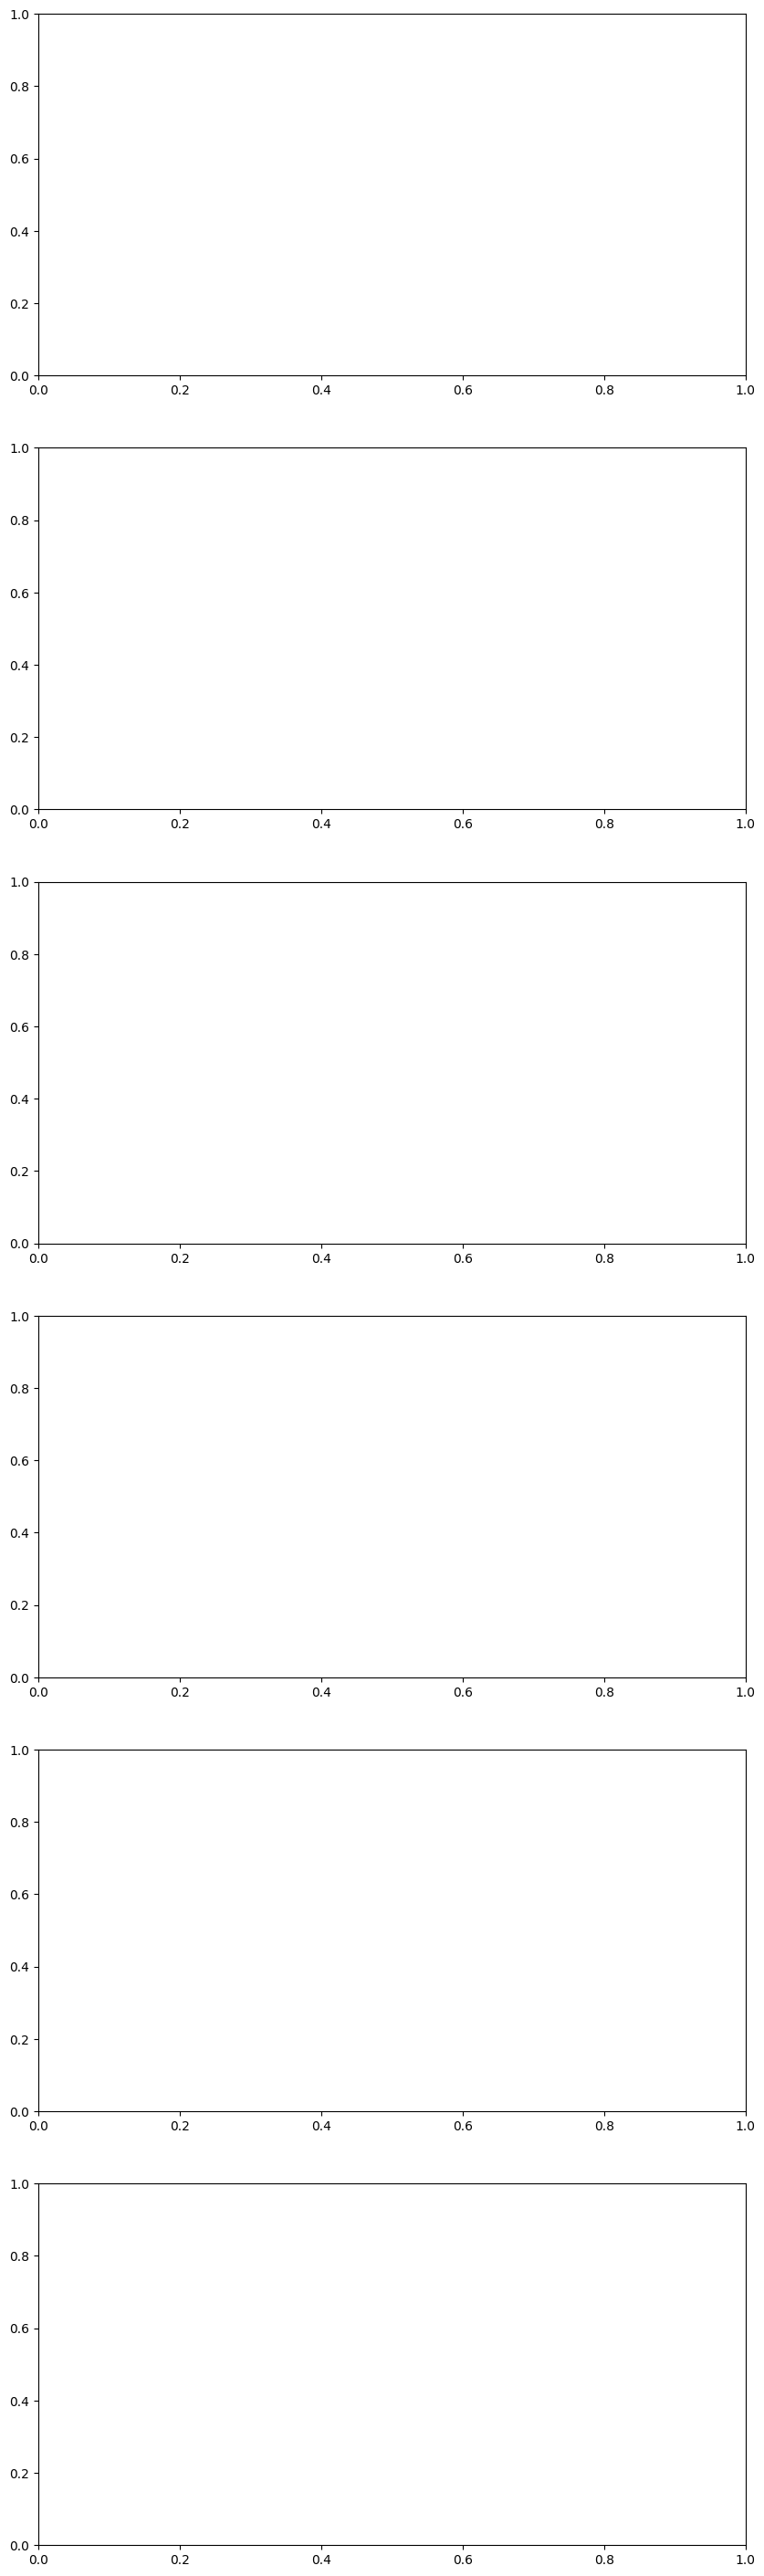

In [30]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'results' with models as row names and metrics as columns

# Define the models and metrics
models = results['Unnamed: 0'].tolist()
metrics = results.columns.tolist()[1:]

# Create subplots for each metric
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(10, 6*len(metrics)))

# Plot each metric and save as separate PNG files
for metric in metrics:
    fig, ax = plt.subplots(figsize=(8, 6))
    values = results[metric].values
    y_pos = range(len(models))

    ax.barh(y_pos, values, left = 0)  # Set a small height for the bars
    ax.set_xlabel(metric)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(models)
    ax.set_xlim([0, max(values) * 1.1])  # Adjust x-axis limit

    # Save the plot as a separate PNG file
    plt.savefig(f'{metric}_plot.png')
    plt.close()


In [31]:
import pickle

# Assuming you have a trained model object named "model"
# Pickle the model
with open('model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)